<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 5: Vizualising Data with Seaborn</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h3>Lecture Outline</h3>

<ul>
    <li>Quick Overview and Installation</li>
    <li>Distribution Plots</li>
    <li>Categorical Plots</li>
    <li>Matrix Plots</li>
    <li>Regression Plots</li>
 </ul>


<h3>Overview and Installation</h3>

Seaborn is a Python visualization library built on top of Matplotlib and is especially designed for statistical plotting. In addition to having a wide range of beautiful styles and graphs it also works really well with Panda DataFrames.

 If you don't already have Seaborn installed in your computer, then you may install it either from your command line using the `pip` install command or from the anaconda terminal using the `conda` command:
 <center>

```python
pip install seaborn

conda install seaborn
```
</center>

For a more detailed and complete tutorial of Matplotlib you may visit the official website by clicking on the: <a href='https://seaborn.pydata.org/'>Seaborn Website</a>

<br>

Let's begin by importing seaborn, pandas, and numpy.
   

In [243]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Data Set</h3>

`Seaborn` comes with a few pre-loaded data sets, so for the sake of illustration, we will use one of these sets.

In [246]:
diamonds=sns.load_dataset('diamonds', cache=True)

In [248]:
diamonds.shape

(53940, 10)

In [250]:
[np.random.randint(50000) for i in range(10)]

[7538, 31547, 45288, 40713, 24302, 24977, 7704, 18357, 43883, 41249]

In [251]:
[0 for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [252]:
diamonds=diamonds.iloc[[np.random.randint(50000) for i in range(10000)]]

In [253]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
30090,0.32,Premium,H,VS1,60.6,60.0,720,4.44,4.40,2.68
5190,1.07,Ideal,J,SI1,60.8,56.0,3775,6.61,6.57,4.01
33412,0.32,Good,F,VS2,63.6,57.0,828,4.37,4.34,2.77
49181,0.72,Premium,I,VVS2,62.0,56.0,2074,5.75,5.73,3.56
24062,1.37,Ideal,G,VVS2,62.3,55.5,12207,7.05,7.14,4.43


<h3>Description of Dataset</h3>

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.
Content

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = $z / mean(x, y) = 2 * z / (x + y)$ (43--79)

Source: <a href='https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data'>Kaggle</a>

If you want to check all the different pre-loaded datasets in `seaborn`, we may do so as follows:

In [254]:
sns.get_dataset_names()

C:\Users\Valmir.Bucaj\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\Valmir.Bucaj\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

<h3>Distribution Plots</h3>

 Say we wanted to know how the `price` is distributed:


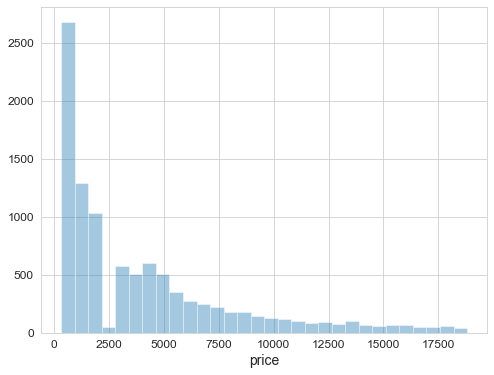

In [259]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('price',fontsize=14)
sns.distplot(diamonds['price'],bins=30,kde=False)
plt.show()

Observe above that we get a `smoothing` of the distribution. This is called the Kernel Density Estimate (KDE) and is an empirical estimate of the underlying distribution of our data. We may turn this off, if we want to, by setting `kde=False`, in which case we just have a histogram. You can experiment with all the different parmeters such as `bins, color` etc.

What are some quick observations regarding the prices of the diamonds?

<h4>Comparing Distributions of Two Features</h4>

  In case we are interested in comparing (visually) the distributions of two different features, say for example we are interested in knowing how the `carat` distribution compares to the `price`, then we may do so by using the `.jointplot()` method:

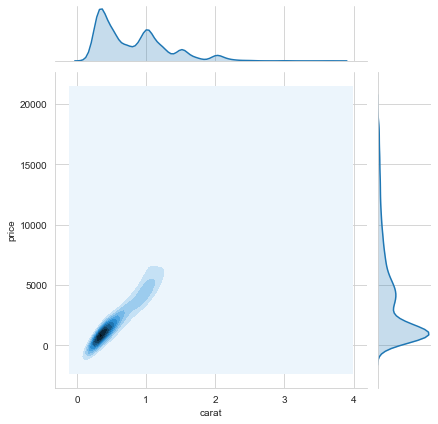

In [268]:
sns.set_style('whitegrid')
sns.jointplot(x='carat',y='price',data=diamonds,kind='kde')

plt.show()

<font color='red' size=4> Practice</font>

Go ahead, and experiment with the differnt types of parameters, specifically try setting `kind=` to `hex`, `kde` and `reg` and see what you get.

<font color='red' size=4> Question:</font> What are some quick observations you can draw by looking at this scatterplot? 



In case we wanted to compare distributions for every single combination of the (numerical)features in our data, instead of using the `.jointplot()` repeatedly, we can do it all at once via the `.pairplot()` method:


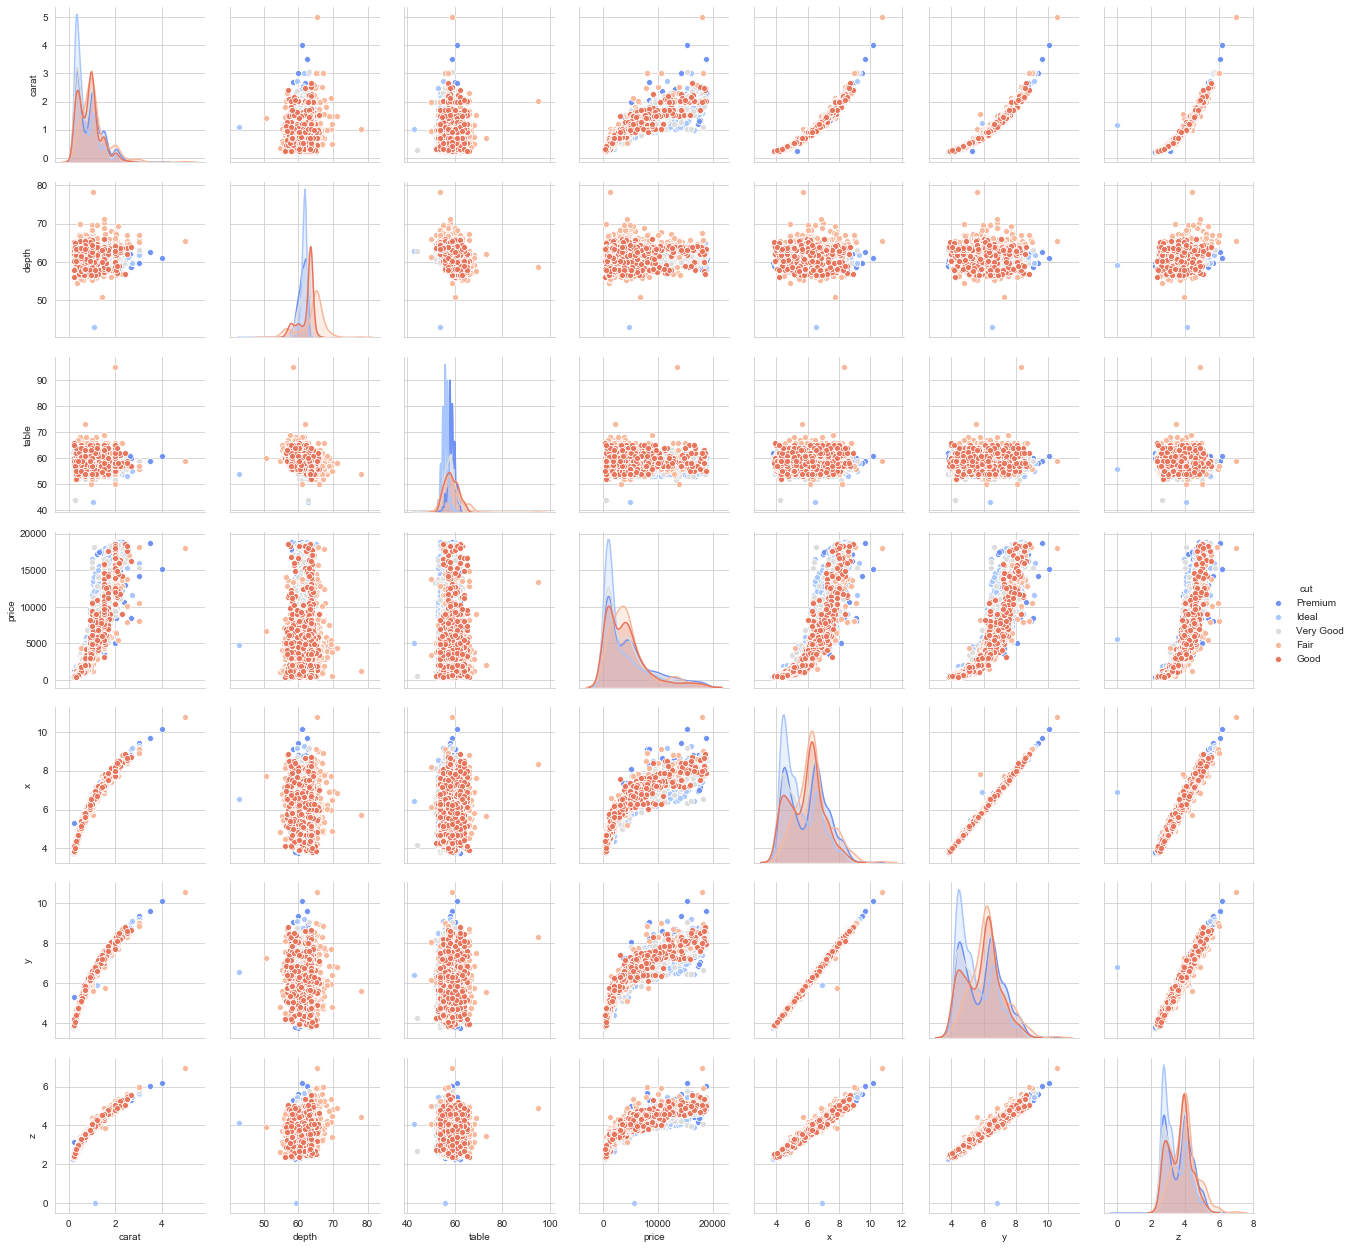

In [123]:
sns.pairplot(data=diamonds,hue='cut',palette='coolwarm')

 In the pairplot we can pass on a categorical column for the `hue` parameter. For example, if we pass on the `color` or `cut` column for `hue`, then what's going to happen is that the scatter plots will be colored based off the color or cut of the diamond.
 
 <font color='red' size='4'>Practice</font>: Experiment with the different parameters.

<h2> Categorical Plots</h2>

What if for example we wanted to visualize a certain statistic of a numerical feature, such as `price, carat, depth ` etc. based off a categorical variable such as `color, cut ` etc.? In what follows we will talk about a few of the ways we can do this.

<h3> Barplot</h3>

A barplot takes in a categorical variable for x and a numerical variable for y, and it computes and visualizes different statistics(e.g. mean, standard deviation etc.) of the numerical feature for each of the categories. This should remind you of the `.groupby()` method we learned when we talked about Pandas. 

Depending on what statistic we want to compute, we can determine this by setting `estimator=` to `np.mean, np.std, np.median` etc.

In [269]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
30090,0.32,Premium,H,VS1,60.6,60.0,720,4.44,4.40,2.68
5190,1.07,Ideal,J,SI1,60.8,56.0,3775,6.61,6.57,4.01
33412,0.32,Good,F,VS2,63.6,57.0,828,4.37,4.34,2.77
49181,0.72,Premium,I,VVS2,62.0,56.0,2074,5.75,5.73,3.56
24062,1.37,Ideal,G,VVS2,62.3,55.5,12207,7.05,7.14,4.43


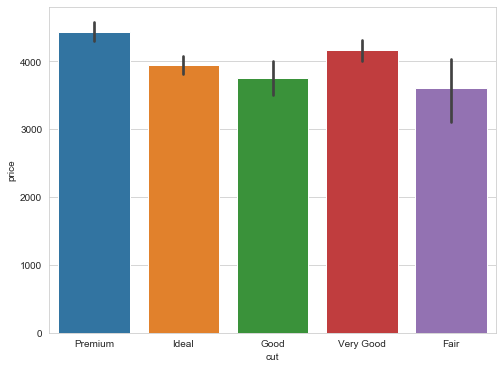

In [274]:
plt.figure(figsize=(8,6))
sns.barplot(x='cut',y='price',data=diamonds,estimator=np.std)
plt.show()

<font color='red' size=5> Practice</font>

Take a few moments and experiment with the different categorical and numerical features and different aggregate functions. Try to see if you observe anything interesting!

<h3>Countplot</h3>

Sometimes we may simply be interested in knowing home many members of each category we have in our data. For this purpose we may use a `countplot`. It is essentially a `barplot` with the `estimator` set to be a count function. It also has a `hue` parameter, where you may specifically see how many of the elements in the selected `hue` are in each of the categories you are counting.

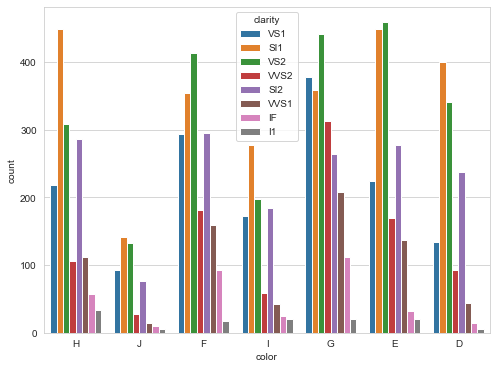

In [278]:
plt.figure(figsize=(8,6))
sns.countplot(x='color',data=diamonds,hue='clarity')
plt.show()

<h3>Boxplots</h3>

We already discussed Boxplots when we talked about Matplotlib. We just want to briefly mention here that we can built them via seaborn as well. As we have already seen, Boxplots are great if we want to gain a good understanding of the distributions of different variables, as well as the distribution of a certain numerical value for the different categories. For example, if we were interested in knowing how the `price` of the diamonds is distributed among the diamonds of different `cut, color` etc. then a boxplot is a great way to gain a visual representation.

It also has a `hue` parameter, which may be useful if we want to gain a better understanding of the distribution of the values of another category within each of the first selected category. 

Let's discuss and illustrate all of these features below:

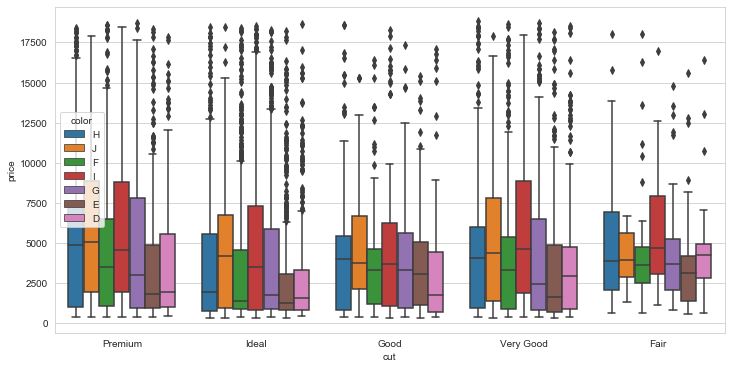

In [282]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cut',y='price',data=diamonds,hue='color')

<font color='red' size='5'>Practice</font>: Take a few moments and experiment with all the different parameters and features and see if you notice anything interesting in the data.

<h2>Violinplots</h2>

Violinplots are very similar to boxplots, in the sense that it also shows the distributions of the categorical data but in a slightly different way: it shows the kernel density estimations for each of the categories. Its innerworkings and parameters,however, are very similar as for the boxplot, including the `hue` parameter.

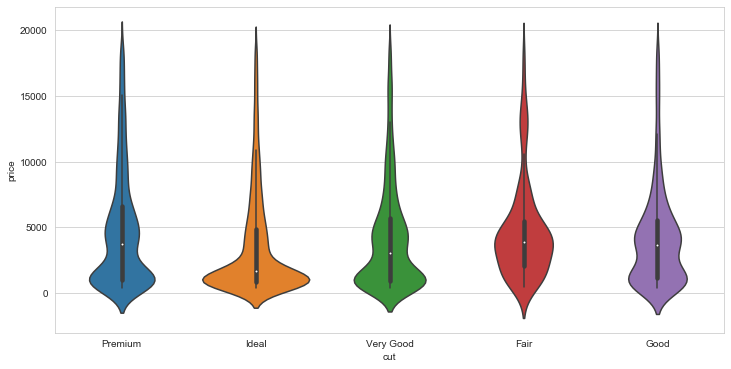

In [215]:
plt.figure(figsize=(12,6))

sns.violinplot(x='cut',y='price',data=diamonds)
plt.show()

Violinplots are especially aesthetacilly pleasing if we have a binary categorical data to set for `hue`. 

 <hr style="height:3px;border:none;color:#333;background-color:#333;" />
<font color='red' size='5'> Exercise</font>

In this exercise you are to replace all the colors `E, G, I, J, F` with the color `D`. So, at the end of the day you should end up with only colors `D` and `H`. Once you do this, go ahead and set `hue` to `color`.

In [208]:
#Enter Code here 


In [216]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
46223,0.50,Premium,D,VS2,61.4,59.0,1752,5.11,5.15,3.15
34410,0.30,Ideal,D,IF,62.3,56.0,863,4.31,4.32,2.69
26666,1.52,Very Good,D,VS1,62.4,55.0,16485,7.33,7.41,4.60
31628,0.30,Ideal,H,SI1,62.2,57.0,450,4.27,4.31,2.67
10924,1.04,Premium,D,VS1,61.6,56.0,4892,6.59,6.52,4.04


 <hr style="height:3px;border:none;color:#333;background-color:#333;" />

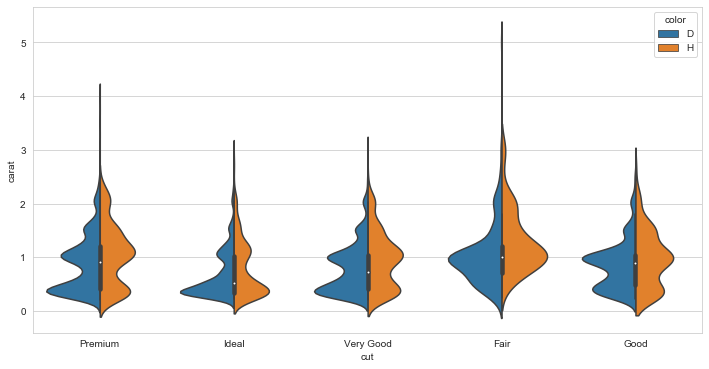

In [214]:
plt.figure(figsize=(12,6))
sns.violinplot(x='cut',y='carat',data=diamonds,hue='color',split=True)

<h2>Matrix Plots - Heatmaps & Clustermaps</h2>

One situation where we will often use the Heatmaps is to display the correlation between the different (numerical) features in our data. 

Recall that the <b> correlation</b> coefficient $\rho_{X,Y}$ between two random variables $X$ and $Y$ is given by:

$$\rho_{X,Y}=\frac{Cov(X,Y)}{\sigma_X\sigma_Y},$$
where $Cov(X,Y)=E\left[XY\right]-E\left[X\right]E\left[Y\right]$ and $\sigma_X,\sigma_Y$ are the respective standard deviations.

Recall from Linear Algebra, that if our data is normalized to have mean zero and standard deviation one, then the correlation matrix for our data is is simply given by $$Corr(A)=\frac{1}{n-1}A^TA$$

where by $A$ we have denoted our datamatrix (for example the dataframe `diamonds`, after normalization, in our case)

For example, if we were interested in understanding what the correlation between all the different features in the `diamonds` dataset, we can represent that nicely via a heatmap:

In [231]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.044902,0.185402,0.923410,0.978360,0.977359,0.976624
depth,0.044902,1.000000,-0.282835,0.007409,-0.010441,-0.013958,0.106792
table,0.185402,-0.282835,1.000000,0.131183,0.197904,0.191941,0.159820
price,0.923410,0.007409,0.131183,1.000000,0.893604,0.895195,0.888636
x,0.978360,-0.010441,0.197904,0.893604,1.000000,0.998832,0.990643
y,0.977359,-0.013958,0.191941,0.895195,0.998832,1.000000,0.990346
z,0.976624,0.106792,0.159820,0.888636,0.990643,0.990346,1.000000


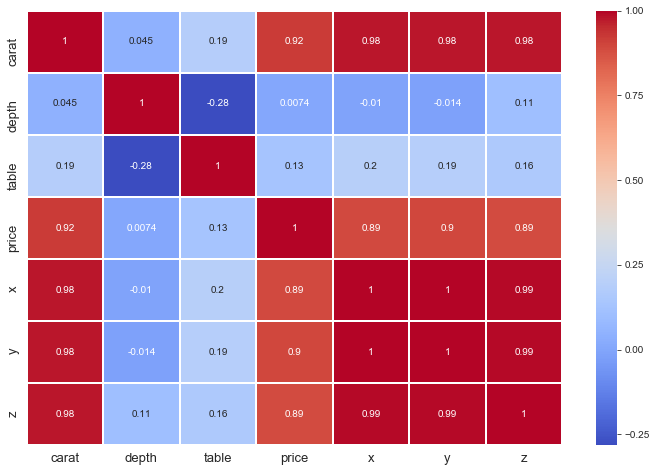

In [234]:
plt.figure(figsize=(12,8))
sns.heatmap(diamonds.corr(),cmap='coolwarm',annot=True,linecolor='white',lw='1')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<h3>Clustermaps</h3>

Clustermaps are similar in flavor to Heatmaps, however, instead of plotting correlations between the variables, under the hood firt Hiearchical Clustering is run (we will learn about this when we discuss the unsupervised learning methods later in the semester, so don't worry too much about understanding the mechanics behind it for now) and then a variables that are more similar to one another are placed closer to each other.

<Figure size 864x576 with 0 Axes>

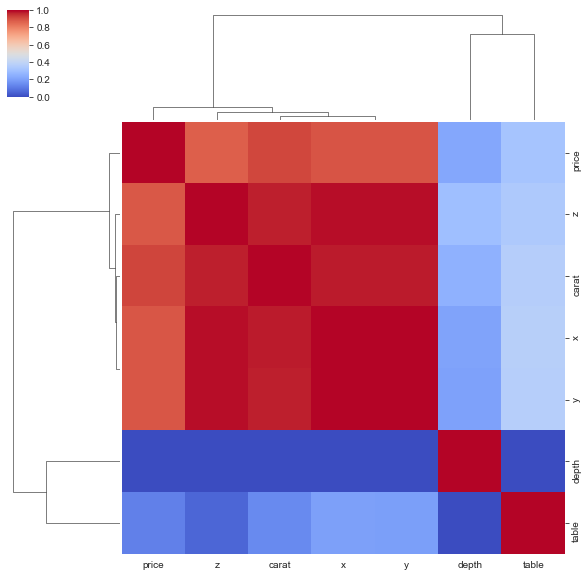

In [242]:
plt.figure(figsize=(12,8))

sns.clustermap(diamonds.corr(),cmap='coolwarm',standard_scale=1)
plt.show()